In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings
import os
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm


plt.rcParams['font.family'] = "MS Gothic"
warnings.simplefilter('ignore')

In [ ]:
def fix_all_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
fix_all_seeds(0)

In [ ]:
GRAPH_DIR = Path("/content/drive/MyDrive/Kaggle/花粉飛散量（ProbSpace）/proc/graph")

# データ読み込み

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle/花粉飛散量（ProbSpace）/raw/train_v2.csv")
test = pd.read_csv("/content/drive/MyDrive/Kaggle/花粉飛散量（ProbSpace）/raw/test_v2.csv")
sub = pd.read_csv("/content/drive/MyDrive/Kaggle/花粉飛散量（ProbSpace）/raw/sample_submission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  12240 non-null  int64  
 1   precipitation_utsunomiya  12240 non-null  float64
 2   precipitation_chiba       12240 non-null  float64
 3   precipitation_tokyo       12240 non-null  object 
 4   temperature_utsunomiya    12240 non-null  float64
 5   temperature_chiba         12240 non-null  object 
 6   temperature_tokyo         12240 non-null  object 
 7   winddirection_utsunomiya  12240 non-null  int64  
 8   winddirection_chiba       12240 non-null  object 
 9   winddirection_tokyo       12240 non-null  object 
 10  windspeed_utsunomiya      12240 non-null  float64
 11  windspeed_chiba           12240 non-null  object 
 12  windspeed_tokyo           12240 non-null  object 
 13  pollen_utsunomiya         12240 non-null  float64
 14  pollen

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  336 non-null    int64  
 1   precipitation_utsunomiya  336 non-null    float64
 2   precipitation_chiba       336 non-null    float64
 3   precipitation_tokyo       336 non-null    float64
 4   temperature_utsunomiya    336 non-null    float64
 5   temperature_chiba         336 non-null    float64
 6   temperature_tokyo         336 non-null    float64
 7   winddirection_utsunomiya  336 non-null    int64  
 8   winddirection_chiba       336 non-null    int64  
 9   winddirection_tokyo       336 non-null    int64  
 10  windspeed_utsunomiya      336 non-null    float64
 11  windspeed_chiba           336 non-null    float64
 12  windspeed_tokyo           336 non-null    float64
 13  pollen_utsunomiya         336 non-null    int64  
 14  pollen_chi

# 前処理

## object型の対応

In [ ]:
# ここから
cols_object = [
    "precipitation_tokyo",
    "temperature_chiba",
    "temperature_tokyo",
    "winddirection_chiba",
    "winddirection_tokyo",
    "windspeed_chiba",
    "windspeed_tokyo"
]
for col in cols_object:
    train[col] = pd.to_numeric(train[col], errors = 'coerce')
    test[col] = pd.to_numeric(test[col], errors = 'coerce')
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  12240 non-null  int64  
 1   precipitation_utsunomiya  12240 non-null  float64
 2   precipitation_chiba       12240 non-null  float64
 3   precipitation_tokyo       12238 non-null  float64
 4   temperature_utsunomiya    12240 non-null  float64
 5   temperature_chiba         12237 non-null  float64
 6   temperature_tokyo         12237 non-null  float64
 7   winddirection_utsunomiya  12240 non-null  int64  
 8   winddirection_chiba       12237 non-null  float64
 9   winddirection_tokyo       12237 non-null  float64
 10  windspeed_utsunomiya      12240 non-null  float64
 11  windspeed_chiba           12237 non-null  float64
 12  windspeed_tokyo           12237 non-null  float64
 13  pollen_utsunomiya         12240 non-null  float64
 14  pollen

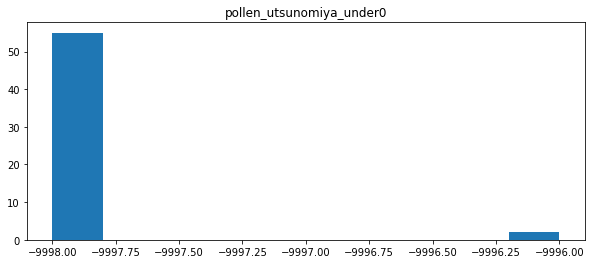

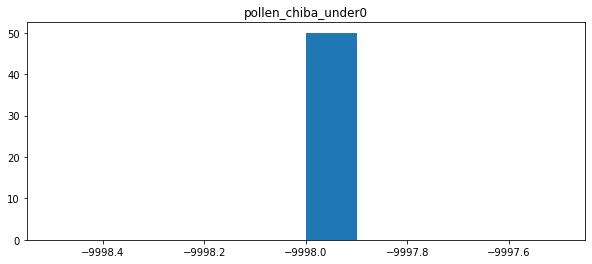

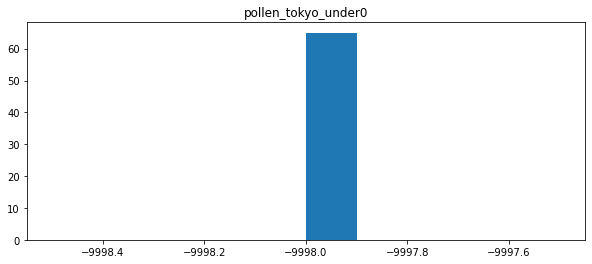

In [ ]:
objectives = [
    "pollen_utsunomiya",
    "pollen_chiba",
    "pollen_tokyo"
]

for col in objectives:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.hist(train.loc[train[col]<0, col])
    ax.set_title(f"{col}_under0")
    plt.show()

In [ ]:
# 花粉飛散量がマイナスのやつは0
train.loc[train["pollen_utsunomiya"]<0, "pollen_utsunomiya"] = 0
train.loc[train["pollen_chiba"]<0, "pollen_chiba"] = 0
train.loc[train["pollen_tokyo"]<0, "pollen_tokyo"] = 0

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  12240 non-null  int64  
 1   precipitation_utsunomiya  12240 non-null  float64
 2   precipitation_chiba       12240 non-null  float64
 3   precipitation_tokyo       12238 non-null  float64
 4   temperature_utsunomiya    12240 non-null  float64
 5   temperature_chiba         12237 non-null  float64
 6   temperature_tokyo         12237 non-null  float64
 7   winddirection_utsunomiya  12240 non-null  int64  
 8   winddirection_chiba       12237 non-null  float64
 9   winddirection_tokyo       12237 non-null  float64
 10  windspeed_utsunomiya      12240 non-null  float64
 11  windspeed_chiba           12237 non-null  float64
 12  windspeed_tokyo           12237 non-null  float64
 13  pollen_utsunomiya         12240 non-null  float64
 14  pollen

## 時系列の特徴量

In [ ]:
def fetch_datetime_features(df):
    df["year"] = df["datetime"].map(lambda x: int(str(x)[:4]))
    df["month"] = df["datetime"].map(lambda x: int(str(x)[4:6]))
    df["day"] = df["datetime"].map(lambda x: int(str(x)[6:8]))
    df["hour"] = df["datetime"].map(lambda x: int(str(x)[8:]))
    df["datetime2"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
    df["date_int"] = df["datetime"].map(lambda x: int(str(x)[:8]))

    df["dayOfYear"] = df["datetime2"].dt.dayofyear

    # 日付をindexにする
    df.set_index("datetime2", inplace=True)
    return df

train = fetch_datetime_features(train)
test = fetch_datetime_features(test)

print("train:", train.shape)
print("test:", test.shape)
train.tail()

train: (12240, 22)
test: (336, 22)


,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,year,month,day,hour,date_int,dayOfYear
datetime2,,,,,,,,,,,,,,,,,,,,,
2020-03-31 20:00:00,2020033120,0.0,0.0,0.0,10.0,11.5,9.4,16,2.0,16.0,...,0.7,8.0,8.0,4.0,2020,3,31,20,20200331,91
2020-03-31 21:00:00,2020033121,0.0,0.0,0.0,10.1,11.3,8.9,15,15.0,14.0,...,1.3,8.0,4.0,4.0,2020,3,31,21,20200331,91
2020-03-31 22:00:00,2020033122,0.0,0.0,0.0,9.8,11.3,8.8,3,15.0,15.0,...,0.9,0.0,4.0,0.0,2020,3,31,22,20200331,91
2020-03-31 23:00:00,2020033123,0.5,0.0,0.0,9.7,10.9,8.9,16,16.0,1.0,...,0.6,0.0,0.0,0.0,2020,3,31,23,20200331,91
2020-04-01 00:00:00,2020033124,0.0,0.0,0.0,9.7,10.7,8.9,16,1.0,16.0,...,0.4,0.0,8.0,0.0,2020,3,31,24,20200331,92


# 目的変数の箱ひげ図

In [ ]:
train_test = pd.concat((train, test)).sort_index()
dfs_for_boxplot = []
for district in ["utsunomiya", "tokyo", "chiba"]:
    tmp = train_test[["year", f"pollen_{district}"]].rename(columns={ f"pollen_{district}": "pollen"})
    tmp["district"] = district
    dfs_for_boxplot.append(tmp)

df_for_boxplot = pd.concat(dfs_for_boxplot)
df_for_boxplot.head()

,year,pollen,district
datetime2,,,
2017-02-01 01:00:00,2017,0.0,utsunomiya
2017-02-01 02:00:00,2017,0.0,utsunomiya
2017-02-01 03:00:00,2017,4.0,utsunomiya
2017-02-01 04:00:00,2017,0.0,utsunomiya
2017-02-01 05:00:00,2017,0.0,utsunomiya


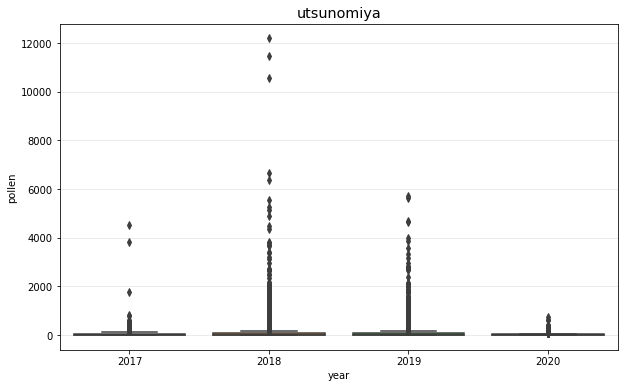

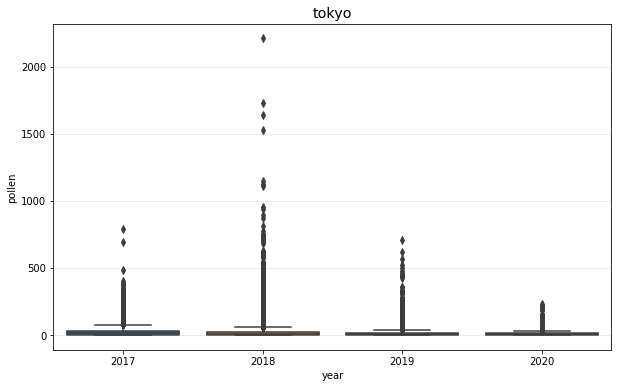

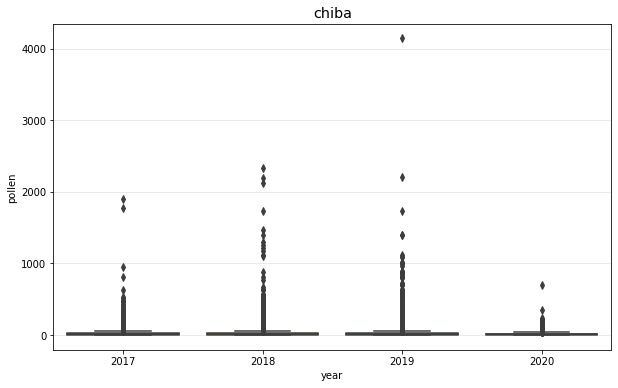

In [ ]:
for district in ["utsunomiya", "tokyo", "chiba"]:
    tmp = df_for_boxplot[df_for_boxplot["district"]==district]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.2, color="gray")
    ax.set_title(district, size="x-large")
    sns.boxplot(x="year", y="pollen", data = tmp, ax=ax);

## 異常値の時のデータ確認

In [ ]:
def plot_transition1(df, yname_ax1, yname_ax2, title):
    fig = make_subplots(
        specs=[[{"secondary_y": True}]]
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[yname_ax1],
            name=yname_ax1
        ), secondary_y=False
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[yname_ax2],
            name=yname_ax2
        ), secondary_y=True
    )

    fig.update_yaxes(title_text=yname_ax1, secondary_y=False)
    fig.update_yaxes(title_text=yname_ax2, secondary_y=True) 
    fig.update_layout(title=title, height=400)
    fig.show()

### 2018年の宇都宮のデータ

In [ ]:
train_2018 = train[train["year"]==2018]
train_2018[train_2018["pollen_utsunomiya"]>=6000]

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,year,month,day,hour,date_int,dayOfYear
datetime2,,,,,,,,,,,,,,,,,,,,,
2018-03-29 04:00:00,2018032904,0.0,0.0,0.0,9.8,14.0,12.1,16,12.0,12.0,...,1.4,6359.0,204.0,336.0,2018,3,29,4,20180329,88
2018-03-29 05:00:00,2018032905,0.0,0.0,0.0,10.3,13.8,11.2,1,10.0,14.0,...,0.8,6666.0,217.0,172.0,2018,3,29,5,20180329,88
2018-03-30 02:00:00,2018033002,0.0,0.0,0.0,13.5,16.5,13.8,1,15.0,1.0,...,2.4,12193.0,553.0,98.0,2018,3,30,2,20180330,89
2018-03-30 03:00:00,2018033003,0.0,0.0,0.0,12.0,16.9,12.7,1,15.0,1.0,...,2.3,11475.0,319.0,94.0,2018,3,30,3,20180330,89
2018-03-30 04:00:00,2018033004,0.0,0.0,0.0,11.0,15.7,11.5,1,16.0,1.0,...,3.2,10582.0,401.0,159.0,2018,3,30,4,20180330,89


In [ ]:
# train_2018_MarchToApril = train_2018[train_2018["month"].isin([3, 4])]
plot_transition1(
    train_2018,
    "pollen_utsunomiya",
    "temperature_utsunomiya",
    "Pollen vs Temperature (Utsunomiya)"
)

In [ ]:
plot_transition1(
    train_2018,
    "pollen_utsunomiya",
    "windspeed_utsunomiya",
    "Pollen vs Temperature (Utsunomiya)"
)

In [ ]:
plot_transition1(
    train_2018,
    "pollen_utsunomiya",
    "precipitation_utsunomiya",
    "Pollen vs Temperature (Utsunomiya)"
)

# グラフをいったん保存

In [ ]:
def plot_transition2(df, district, title, save=False, save_path=None):
    fig = make_subplots(
        rows=3,
        cols=1,
        subplot_titles=("Temperature", "Wind Speed", "Precipitation"),
        shared_xaxes=True,
        specs=[[{"secondary_y": True}],
               [{"secondary_y": True}],
               [{"secondary_y": True}]]
    )

    # 1段目
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"pollen_{district}"],
            name=f"pollen_{district[:5]}",
            marker={"color": "#ff4b00"},
        ), row=1, col=1, secondary_y=False
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"temperature_{district}"],
            name=f"temperature_{district[:5]}",
            marker={"color": "#03af7a"},
        ), row=1, col=1, secondary_y=True
    )
    fig.update_yaxes(title_text=f"pollen_{district}", row=1, col=1, secondary_y=False)
    fig.update_yaxes(title_text=f"temperature_{district}", row=1, col=1, secondary_y=True) 
    
    # 2段目
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"pollen_{district}"],
            name=f"pollen_{district[:5]}",
            marker={"color": "#ff4b00"},
        ), row=2, col=1, secondary_y=False
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"windspeed_{district}"],
            name=f"windspeed_{district[:5]}",
            marker={"color": "#005aff"},
        ), row=2, col=1, secondary_y=True
    )
    fig.update_yaxes(title_text=f"pollen_{district}", row=2, col=1, secondary_y=False)
    fig.update_yaxes(title_text=f"windspeed_{district}", row=2, col=1, secondary_y=True) 
    
    # 3段目
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"pollen_{district}"],
            name=f"pollen_{district[:5]}",
            marker={"color": "#ff4b00"},
        ), row=3, col=1, secondary_y=False
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df[f"precipitation_{district}"],
            name=f"precipitation_{district[:5]}",
            marker={"color": "#4dc4ff"},
        ), row=3, col=1, secondary_y=True
    )
    fig.update_yaxes(title_text=f"pollen_{district}", row=3, col=1, secondary_y=False)
    fig.update_yaxes(title_text=f"precipitation_{district}", row=3, col=1, secondary_y=True) 

    fig.update_layout(title=title, height=800)
    if save:
        fig.write_html(save_path)
    else:
        fig.show()

In [ ]:
districts = ["utsunomiya", "tokyo", "chiba"]

train_2017 = train[train["year"]==2017]
for district in districts:
    plot_transition2(
        train_2017,
        district,
        f"{district} 2017",
        save=True,
        save_path=GRAPH_DIR/f"{district}_2017.html"
    )

In [ ]:
train_2018 = train[train["year"]==2018]
for district in districts:
    plot_transition2(
        train_2018,
        district,
        f"{district} 2018",
        save=True,
        save_path=GRAPH_DIR/f"{district}_2018.html"
    )

In [ ]:
train_2019 = train[train["year"]==2019]
for district in districts:
    plot_transition2(
        train_2019,
        district,
        f"{district} 2019",
        save=True,
        save_path=GRAPH_DIR/f"{district}_2019.html"
    )

In [ ]:
train_test_2020 = train_test[train_test["year"]==2020]
for district in districts:
    plot_transition2(
        train_test_2020,
        district,
        f"{district} 2020",
        save=True,
        save_path=GRAPH_DIR/f"{district}_2020.html"
    )